In [2]:
import pandas as pd
import json
import numpy as np

In [6]:
kmer9 = pd.read_csv('kmer9.csv')

kmer9 = kmer9.reset_index()



In [4]:

def kmerCommon(dict1,dict2):
    my_dict = [dict1,dict2]

    common_keys = set.intersection(*map(set,my_dict))
    return len(common_keys)
    



In [5]:
reader=[]

In [6]:


def globalValue(df):
    
    sequences = eval(df['kmer9'])
    length = len(sequences)
    b = np.zeros(shape=(length,length))
    name  = str(df.target_gene)
    for i in range(0,length):
        for j in range(0,length):
            if(b[j][i] != 0):
                b[i][j] = b[j][i]
            else:
                b[i][j] = kmerCommon(sequences[i],sequences[j])
    reader.append(b)
    return b



In [7]:
for i in range(0,len(kmer9)):
    globalValue(kmer9.iloc[i])



In [40]:
a = kmer9[kmer9.target_gene =='ENSG00000014138']

In [41]:
a

,index,Unnamed: 0,target_gene,kmer9,common_keys,common_keys_size,size,max,num,mean,atleastTwo
123,123,130,ENSG00000014138,"[{'TGACAGCAA': 1, 'GACAGCAAA': 1, 'ACAGCAAAC':...",set(),0,10,"{'GGTTGCAGT': 3, 'CCAGCCTGG': 3, 'CAGCCTGGG': ...",3,1.032717,139


In [8]:
np.save('my_dict_kmer9.npy',  reader, allow_pickle=True) 

/storage/bin/anaconda3/envs/yudeepenv/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


In [3]:
jj = np.load('my_dict_kmer9.npy',allow_pickle=True)

In [29]:
jj[3338]

array([[218.,   0.,   3., ...,   1.,   1.,   1.],
       [  0., 874.,   2., ...,   6.,   4.,   6.],
       [  3.,   2., 510., ...,   2.,   8.,   5.],
       ...,
       [  1.,   6.,   2., ..., 657.,  10.,   0.],
       [  1.,   4.,   8., ...,  10., 845.,   0.],
       [  1.,   6.,   5., ...,   0.,   0., 284.]])

In [10]:
reader[0]

array([[222.,   0.,   4., ...,   0.,   0.,   0.],
       [  0., 362.,   1., ...,   0.,   4.,   4.],
       [  4.,   1., 678., ...,   1.,   2.,   2.],
       ...,
       [  0.,   0.,   1., ..., 224.,   0.,   0.],
       [  0.,   4.,   2., ...,   0., 237., 237.],
       [  0.,   4.,   2., ...,   0., 237., 237.]])

In [10]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

In [42]:
clusters = hierarchy.linkage(jj[123], method="complete")
labelList = range(0, len(jj[123]))


In [36]:
def plot_dendrogram(clusters):
    plt.figure(figsize=(20,6))
    dendrogram = hierarchy.dendrogram(clusters, labels=labelList, orientation="top",leaf_font_size=9, leaf_rotation=360)
    plt.ylabel('Distance');

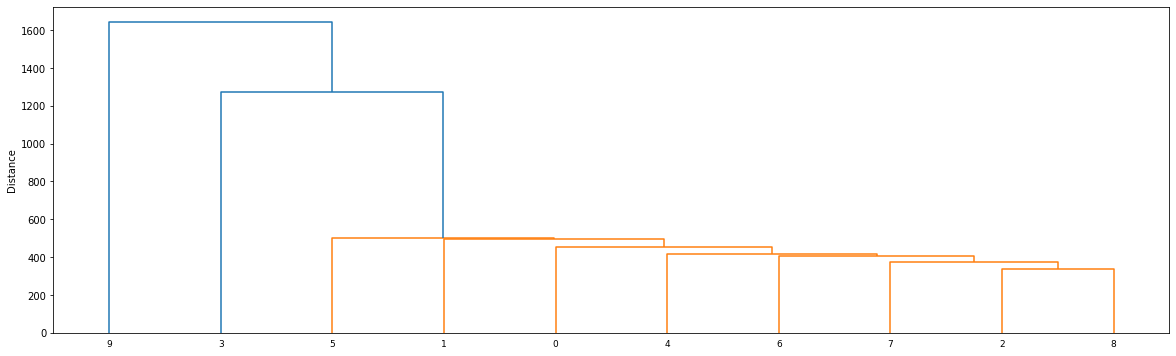

In [43]:
plot_dendrogram(clusters)